# Formative Assesssment - Statistics

#### A dataset on House price is given. Our aim is to examine the price per square feet column, remove its outliers and make it a normal distribution.

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


### Importing data

In [5]:
df=pd.read_csv("house_price.csv")
df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


#### There are 13200 rows and 7 columns

### Performing basic EDA

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13200 non-null  object 
 1   size            13200 non-null  object 
 2   total_sqft      13200 non-null  float64
 3   bath            13200 non-null  float64
 4   price           13200 non-null  float64
 5   bhk             13200 non-null  int64  
 6   price_per_sqft  13200 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 722.0+ KB


In [8]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [9]:
df.columns

Index(['location', 'size', 'total_sqft', 'bath', 'price', 'bhk',
       'price_per_sqft'],
      dtype='object')

In [10]:
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [11]:
df.tail()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
13195,Whitefield,5 Bedroom,3453.0,4.0,231.0,5,6689
13196,other,4 BHK,3600.0,5.0,400.0,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.0,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.0,4,10407
13199,Doddathoguru,1 BHK,550.0,1.0,17.0,1,3090


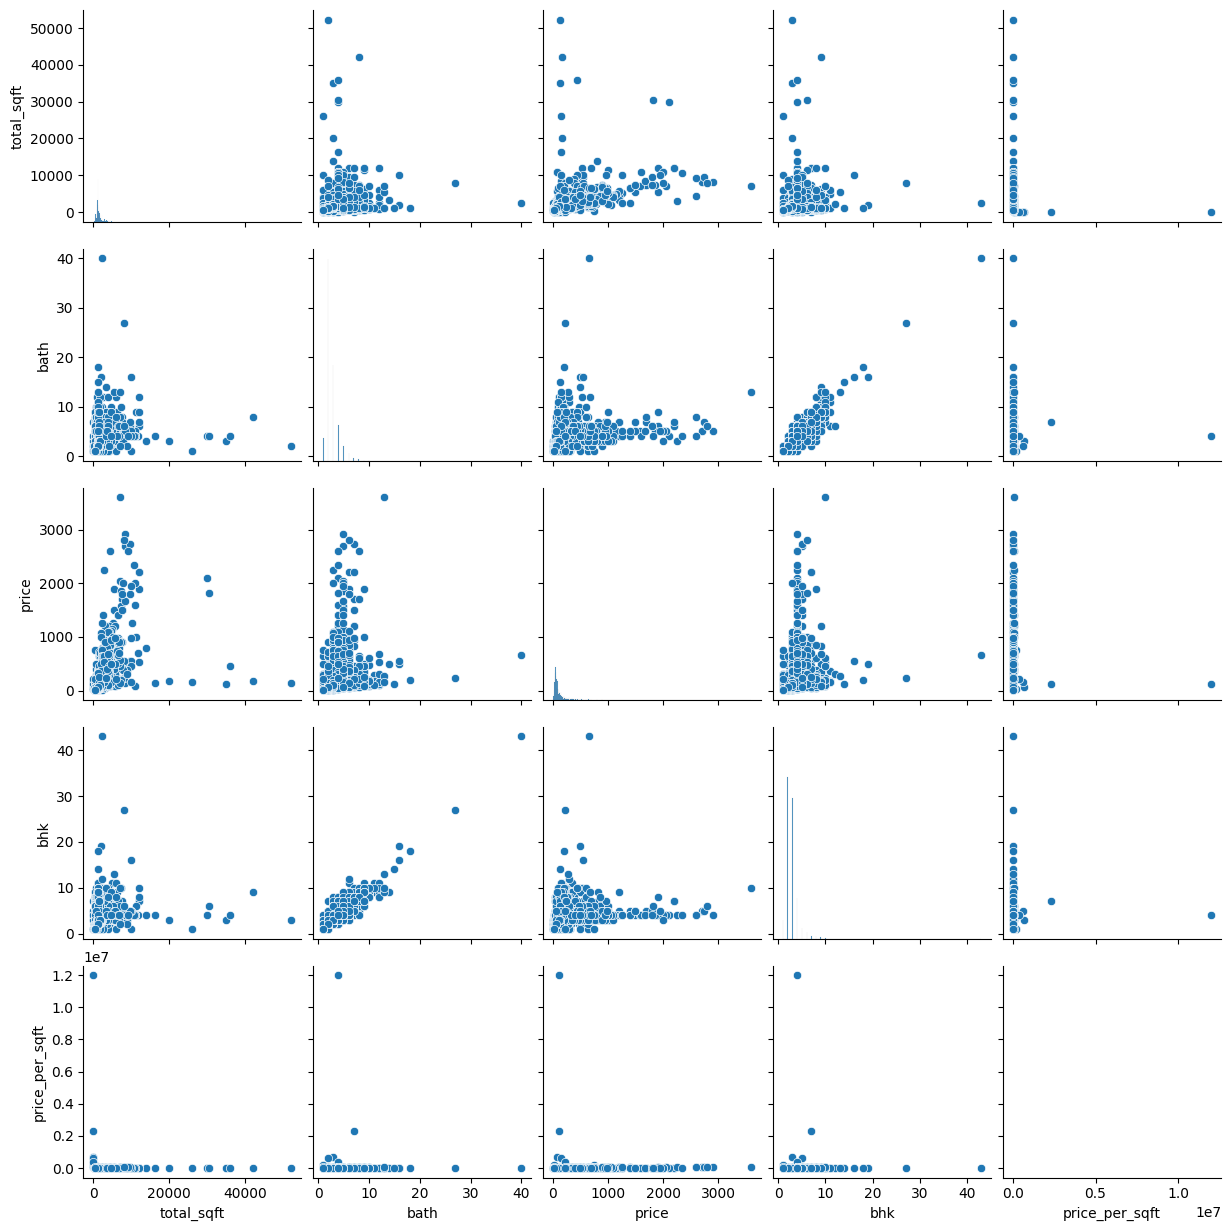

In [12]:
sns.pairplot(df)

C:\Users\gokul\AppData\Local\Temp\ipykernel_19312\3419441522.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["price_per_sqft"])


<Axes: xlabel='price_per_sqft', ylabel='Density'>

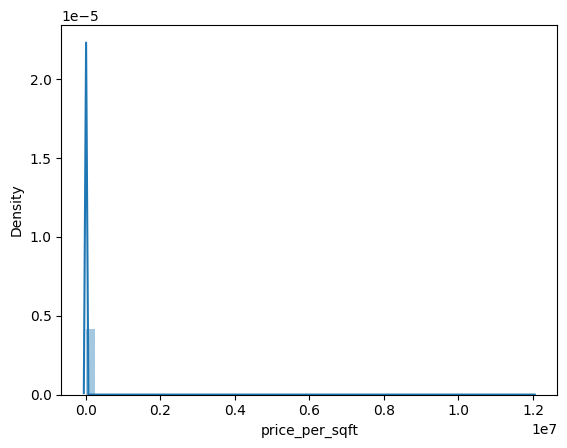

In [13]:
sns.distplot(df["price_per_sqft"])

#### The above graph is right skewed.

## Data Preprocessing

### To check whether there is an outlier, we can draw a boxplot. 

<Axes: ylabel='price_per_sqft'>

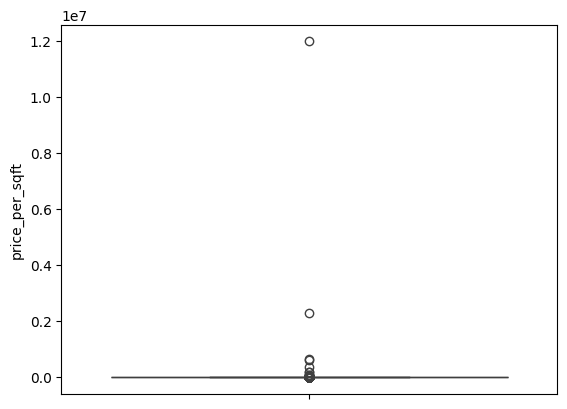

In [16]:
sns.boxplot(df["price_per_sqft"])

#### There are many outliers.

### Removing outliers using mean and standard deviation

In [87]:
mean=df['price_per_sqft'].mean()
std=df['price_per_sqft'].std()
print('Mean : ', mean)
print('std : ',std)

Mean :  7920.336742424242
std :  106727.16032810867


##### -3sigma

In [88]:
mean-(3*std)

-312261.14424190175

##### +3sigma

In [89]:
mean+(3*std)

328101.8177267502

#### Finding outliers

In [90]:
new_df0=df.loc[(df["price_per_sqft"] > 328101) | (df["price_per_sqft"] < -312261)]
new_df0

,location,size,total_sqft,bath,price,bhk,price_per_sqft,log_price_per_sqft
345,other,3 Bedroom,11.0,3.0,74.0,3,672727,13.419095
1106,other,5 Bedroom,24.0,2.0,150.0,5,625000,13.345507
4044,Sarjapur Road,4 Bedroom,1.0,4.0,120.0,4,12000000,16.300417
4924,other,7 BHK,5.0,7.0,115.0,7,2300000,14.648420
11447,Whitefield,4 Bedroom,60.0,4.0,218.0,4,363333,12.803075


## Z-score method

In [91]:
upper_limit = df["price_per_sqft"].mean() + 3*df["price_per_sqft"].std()
lower_limit = df["price_per_sqft"].mean() - 3*df["price_per_sqft"].std()
print("Upper limit :",upper_limit)
print("Lower limit",lower_limit)

Upper limit : 328101.8177267502
Lower limit -312261.14424190175


#### Finding outliers

In [92]:
df.loc[(df["price_per_sqft"] > upper_limit) | (df["price_per_sqft"] < lower_limit)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft,log_price_per_sqft
345,other,3 Bedroom,11.0,3.0,74.0,3,672727,13.419095
1106,other,5 Bedroom,24.0,2.0,150.0,5,625000,13.345507
4044,Sarjapur Road,4 Bedroom,1.0,4.0,120.0,4,12000000,16.300417
4924,other,7 BHK,5.0,7.0,115.0,7,2300000,14.648420
11447,Whitefield,4 Bedroom,60.0,4.0,218.0,4,363333,12.803075


#### Trimming - deleting outlier data

In [93]:
new_df = df.loc[(df["price_per_sqft"] <= upper_limit) & (df["price_per_sqft"] >= lower_limit)]
print("Original data :",len(df))
print("Data  after removing outliers:", len(new_df))
print("No. of outliers :", len(df) - len(new_df))

Original data : 13200
Data  after removing outliers: 13195
No. of outliers : 5


<Axes: ylabel='price_per_sqft'>

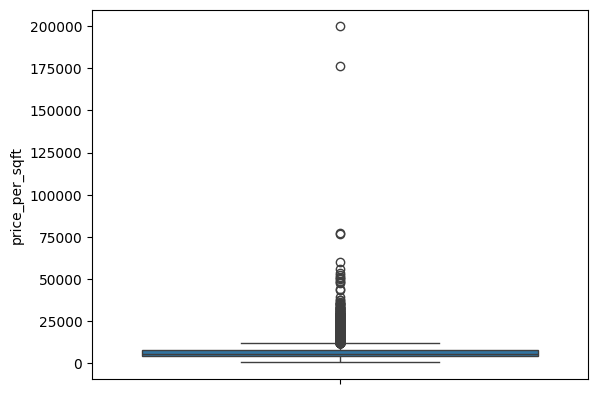

In [82]:
sns.boxplot(new_df["price_per_sqft"])

#### Capping - change outlier values to upper limit and lower limit values

In [94]:
new_df1=df.copy()
new_df1.loc[new_df1['price_per_sqft'] >= upper_limit,'price_per_sqft']=upper_limit
new_df1.loc[new_df1['price_per_sqft'] <= lower_limit,'price_per_sqft']=lower_limit

C:\Users\gokul\AppData\Local\Temp\ipykernel_19312\2221132308.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '328101.8177267502' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  new_df1.loc[new_df1['price_per_sqft'] >= upper_limit,'price_per_sqft']=upper_limit


<Axes: ylabel='price_per_sqft'>

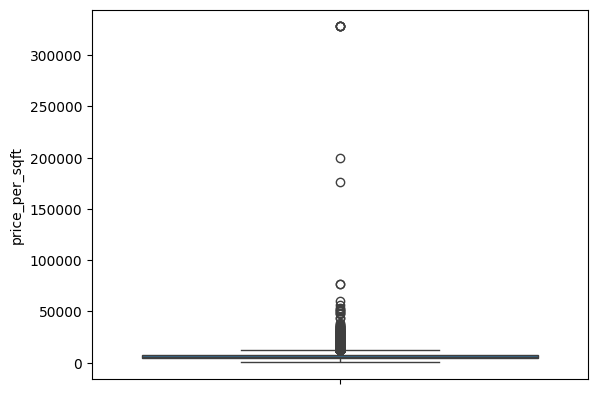

In [31]:
sns.boxplot(new_df1['price_per_sqft'])

## Interquartile Range Method

In [95]:
q1 = df['price_per_sqft'].quantile(0.25)
q3 = df['price_per_sqft'].quantile(0.75)
iqr = q3-q1
print(q1,q3,iqr)

4267.0 7317.0 3050.0


In [96]:
upper_limit = q3 + (1.5 * iqr)
lower_limit = q1 - (1.5 * iqr)
print(lower_limit, upper_limit)

-308.0 11892.0


In [35]:
# find outliers
df.loc[(df["price_per_sqft"] > upper_limit) | (df["price_per_sqft"] < lower_limit)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.0,4,18181
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274
22,Thanisandra,4 Bedroom,2800.0,5.0,380.0,4,13571
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333
48,KR Puram,2 Bedroom,800.0,1.0,130.0,2,16250
...,...,...,...,...,...,...,...
13142,other,2 BHK,1140.0,1.0,185.0,2,16228
13157,other,7 Bedroom,1400.0,7.0,218.0,7,15571
13185,Hulimavu,1 BHK,500.0,1.0,220.0,1,44000
13186,other,4 Bedroom,1200.0,5.0,325.0,4,27083


#### Trimming data

In [97]:
new_df2 = df.loc[(df["price_per_sqft"] <= upper_limit) & (df["price_per_sqft"] >= lower_limit)]
print("Original data :",len(df))
print("Data  after removing outliers:", len(new_df2))
print("No. of outliers :", len(df) - len(new_df2))

Original data : 13200
Data  after removing outliers: 11935
No. of outliers : 1265


<Axes: ylabel='price_per_sqft'>

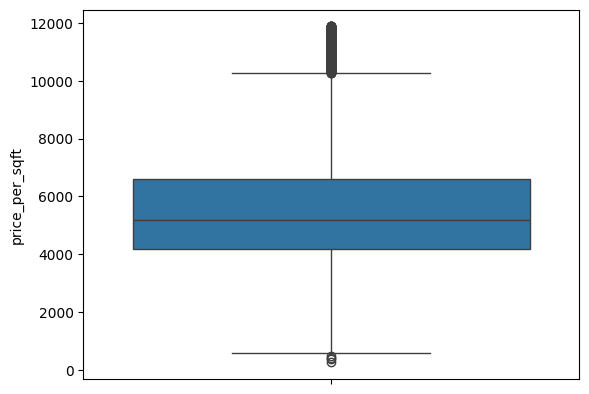

In [37]:
sns.boxplot(new_df2["price_per_sqft"])

#### Capping

In [98]:
new_df3=df.copy()
new_df3.loc[new_df3['price_per_sqft'] >= upper_limit,'price_per_sqft']=upper_limit
new_df3.loc[new_df3['price_per_sqft'] <= lower_limit,'price_per_sqft']=lower_limit

<Axes: ylabel='price_per_sqft'>

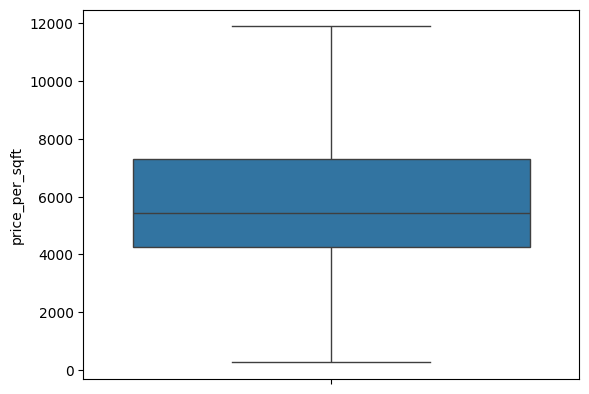

In [39]:
sns.boxplot(new_df3['price_per_sqft'])

##### All the outliers are removed. Hence, interquartile range method is best to remove outliers of this data.

## Percentile method

In [99]:
upper_limit = df['price_per_sqft'].quantile(0.95)
lower_limit = df['price_per_sqft'].quantile(0.05)
print('upper limit :',upper_limit)
print('lower limit :',lower_limit)

upper limit : 15312.099999999984
lower limit : 3107.8500000000004


#### Finding outliers

In [43]:
df.loc[(df["price_per_sqft"] > upper_limit) | (df["price_per_sqft"] < lower_limit)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.0,4,18181
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274
20,Kengeri,1 BHK,600.0,1.0,15.0,1,2500
41,Sarjapur Road,3 BHK,1254.0,3.0,38.0,3,3030
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333
...,...,...,...,...,...,...,...
13157,other,7 Bedroom,1400.0,7.0,218.0,7,15571
13185,Hulimavu,1 BHK,500.0,1.0,220.0,1,44000
13186,other,4 Bedroom,1200.0,5.0,325.0,4,27083
13191,Ramamurthy Nagar,7 Bedroom,1500.0,9.0,250.0,7,16666


#### Trimming data

In [100]:
new_df4 = df.loc[(df["price_per_sqft"] <= upper_limit) & (df["price_per_sqft"] >= lower_limit)]
print("Original data :",len(df))
print("Data  after removing outliers:", len(new_df4))
print("No. of outliers :", len(df) - len(new_df4))

Original data : 13200
Data  after removing outliers: 11880
No. of outliers : 1320


<Axes: ylabel='price_per_sqft'>

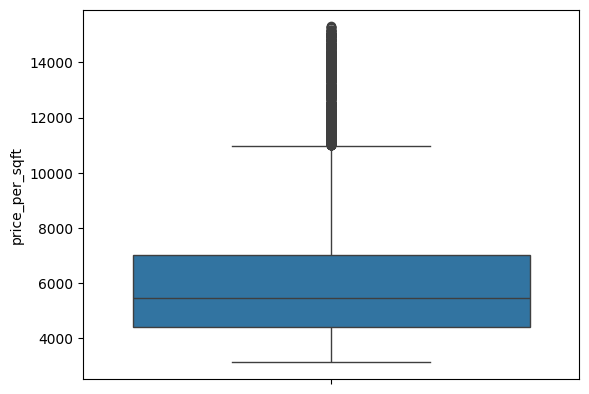

In [45]:
sns.boxplot(new_df4["price_per_sqft"])

#### Capping

In [101]:
new_df5=df.copy()
new_df5.loc[new_df5['price_per_sqft'] >= upper_limit,'price_per_sqft']=upper_limit
new_df5.loc[new_df5['price_per_sqft'] <= lower_limit,'price_per_sqft']=lower_limit

C:\Users\gokul\AppData\Local\Temp\ipykernel_19312\663481689.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '15312.099999999984' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  new_df5.loc[new_df5['price_per_sqft'] >= upper_limit,'price_per_sqft']=upper_limit


<Axes: ylabel='price_per_sqft'>

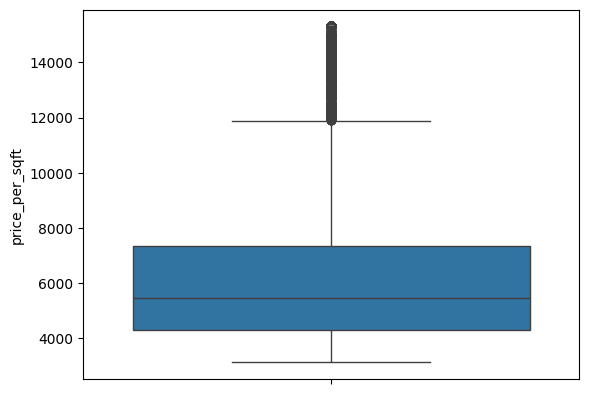

In [47]:
sns.boxplot(new_df5['price_per_sqft'])

#### Distplot before removing outliers

C:\Users\gokul\AppData\Local\Temp\ipykernel_19312\2186227091.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sqft'])


<Axes: xlabel='price_per_sqft', ylabel='Density'>

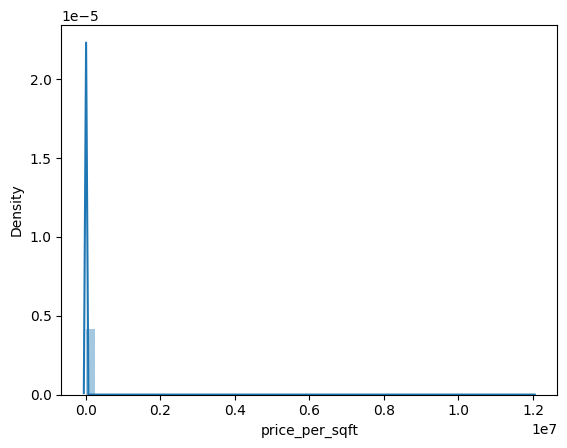

In [102]:
sns.distplot(df['price_per_sqft'])

#### Distplot After removing outliers

C:\Users\gokul\AppData\Local\Temp\ipykernel_19312\241359589.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df3['price_per_sqft'])


<Axes: xlabel='price_per_sqft', ylabel='Density'>

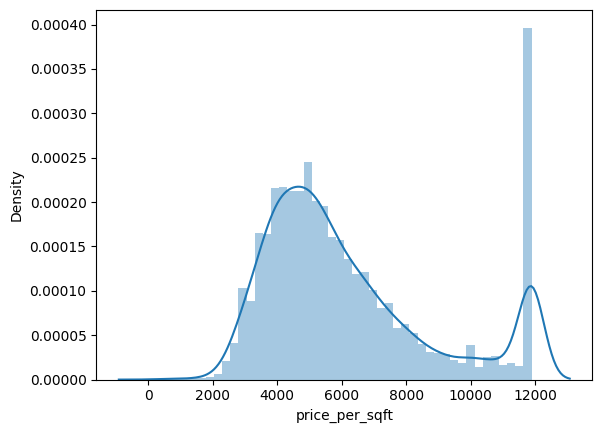

In [49]:
sns.distplot(new_df3['price_per_sqft'])

#### Comparing the above two graphs, outliers have removed to a large extend.

### Histplot with data having outliers

<Axes: xlabel='price_per_sqft', ylabel='Count'>

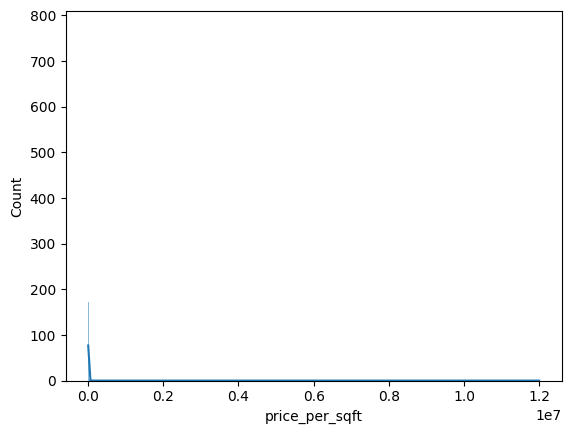

In [51]:
sns.histplot(data=df, x = df.price_per_sqft, kde = True)

### Histplot of cleaned data

<Axes: xlabel='price_per_sqft', ylabel='Count'>

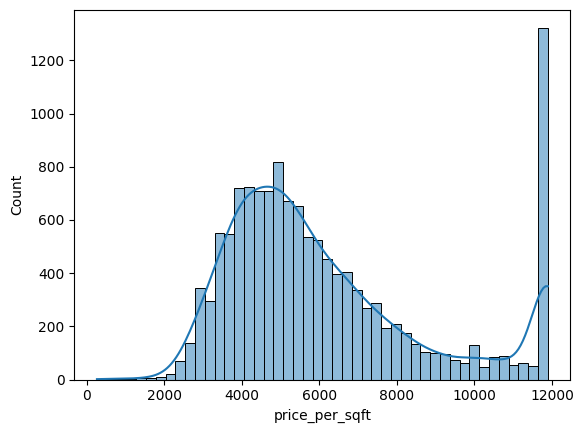

In [52]:
sns.histplot(data=new_df3, x = new_df3.price_per_sqft, kde = True)

#### Graph shows a normal distribution. 

## Finding Skewness and Kurtosis Before transformation

In [55]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [56]:
from scipy.stats import skew,kurtosis
import pandas as pd
import numpy as np

In [57]:
skew = df['price_per_sqft'].skew()
print('Skewness :',skew)

Skewness : 108.28105529705168


### Since value is greater than 1, it is highly skewed. Since the value is positive, the graph is rightly skewed.

In [59]:
kurtosis(df['price_per_sqft'],fisher = False)

12093.633538860382

### Since the value is greater than 3, the graph will be leptokurtic

#### The above result is evident from the following graph.

C:\Users\gokul\AppData\Local\Temp\ipykernel_19312\2999869900.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sqft'])


<Axes: xlabel='price_per_sqft', ylabel='Density'>

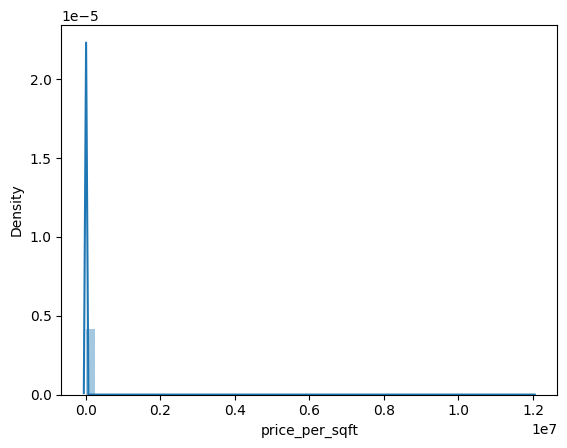

In [61]:
sns.distplot(df['price_per_sqft'])

## Applying logarithmic transformation

In [62]:
df['log_price_per_sqft']=np.log(df['price_per_sqft'])
df['log_price_per_sqft']

0        8.215818
1        8.437067
2        8.367532
3        8.739536
4        8.354674
           ...   
13195    8.808220
13196    9.315691
13197    8.567506
13198    9.250234
13199    8.035926
Name: log_price_per_sqft, Length: 13200, dtype: float64

C:\Users\gokul\AppData\Local\Temp\ipykernel_19312\3796381268.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["log_price_per_sqft"],color='r')


<Axes: xlabel='log_price_per_sqft', ylabel='Density'>

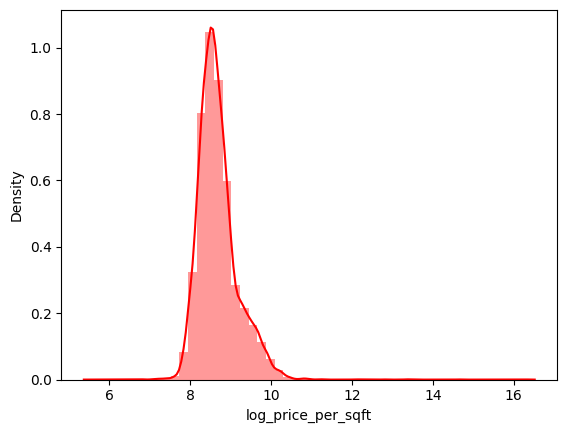

In [63]:
sns.distplot(df["log_price_per_sqft"],color='r')

#### After applying logarithmic transformation, distplot shows almost a normal distribution.

In [64]:
df['log_price_per_sqft'].skew()

1.3998626551353

### The value of skewness is nearer to 1. So, the graph is less skewed

In [66]:
kurtosis(df['log_price_per_sqft'],fisher = False)

12.199636085376468

### Although the value is greater than 3, it has reduced to a large extend than before transformation. 

## Checking correlation between all the numerical columns

In [69]:
df1=df.drop(["location","size","log_price_per_sqft"], axis = 1)
df1

,total_sqft,bath,price,bhk,price_per_sqft
0,1056.0,2.0,39.07,2,3699
1,2600.0,5.0,120.00,4,4615
2,1440.0,2.0,62.00,3,4305
3,1521.0,3.0,95.00,3,6245
4,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...
13195,3453.0,4.0,231.00,5,6689
13196,3600.0,5.0,400.00,4,11111
13197,1141.0,2.0,60.00,2,5258
13198,4689.0,4.0,488.00,4,10407


In [70]:
corr1=df1.corr()
corr1

,total_sqft,bath,price,bhk,price_per_sqft
total_sqft,1.000000,0.392743,0.574330,0.346013,-0.008267
bath,0.392743,1.000000,0.455998,0.897951,0.030883
price,0.574330,0.455998,1.000000,0.396883,0.028387
bhk,0.346013,0.897951,0.396883,1.000000,0.030955
price_per_sqft,-0.008267,0.030883,0.028387,0.030955,1.000000


<Axes: >

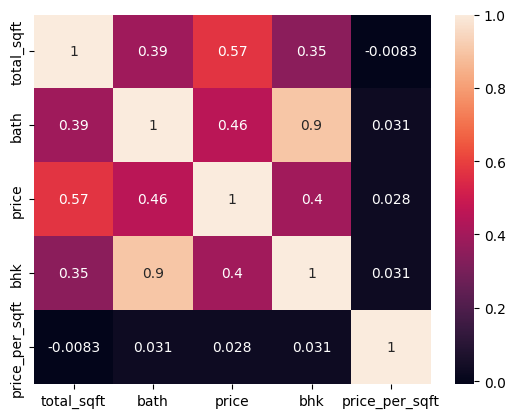

In [71]:
sns.heatmap(corr1,annot=True)

### There is a very less linear relationship among column price_per_sqft and bath, price and bhk.
### There is an inverse relationship between column price_per_sqft and total_sqft.
### There is a good linear relationship between bath and bhk.

## Plotting Scatter Plot

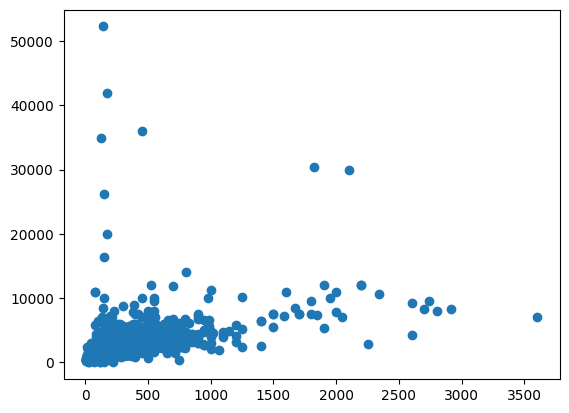

In [73]:
plt.scatter(df['price'],df['total_sqft'])
plt.show()      

#### Have a good correlation

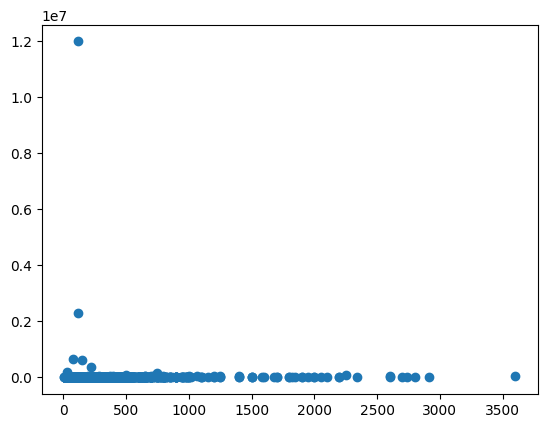

In [74]:
plt.scatter(df['price'],df['price_per_sqft'])
plt.show()     

#### Very less correlation

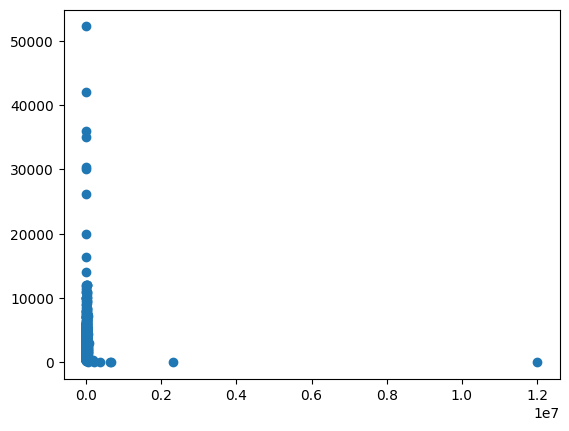

In [75]:
plt.scatter(df['price_per_sqft'],df['total_sqft'])
plt.show()

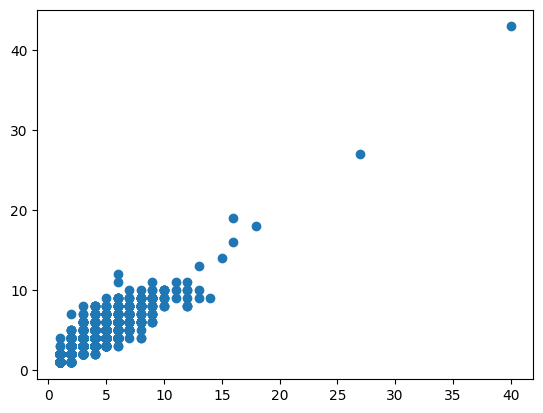

In [76]:
plt.scatter(df['bath'],df['bhk'])
plt.show()      

#### Have a very good correlation